# Prediction of the Price of Used Cars
### (Model: Toyota Corolla)
<br>
<br>

<img src="https://res.cloudinary.com/carsguide/image/upload/f_auto,fl_lossy,q_auto,t_default/v1/editorial/toyota-corolla-2002-used.jpg">

## Project Description
#### Objective: 
*Predicting the price of used cars(Model: Toyota Corolla)
#### Relative Topics: 
*Statistics, Linear Regression, Machine Learning, Prediction, Visualization, Python
#### Data: 
* The data was received from Data Science School
* The two data sets(train, test) were given in csv format


# Importing and Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set(style = 'darkgrid',context = "paper", color_codes = True)
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# The training data is composed of 1019 rows and 39 columns
print (data.shape)
data.tail()

(1019, 39)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1014,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8950,71,10,1998,29000,Petrol,86,1,...,0,1,0,0,0,1,0,0,0,0
1015,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
# Just to get a quick idea, let's check the range of model by year
print ("The range of the model is between ", data['Mfg_Year'].min(), " ~ ", data['Mfg_Year'].max())

The range of the model is between  1998  ~  2004


In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [6]:
col_nu = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 
             'Cylinders', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']

col_cat = ['Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Doors', 'Gears', 'ABS', 'Airbag_1',
           'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

### Quick overview of the relationship between 'Price' and 'Numerical Columns(First 5 Columns) '

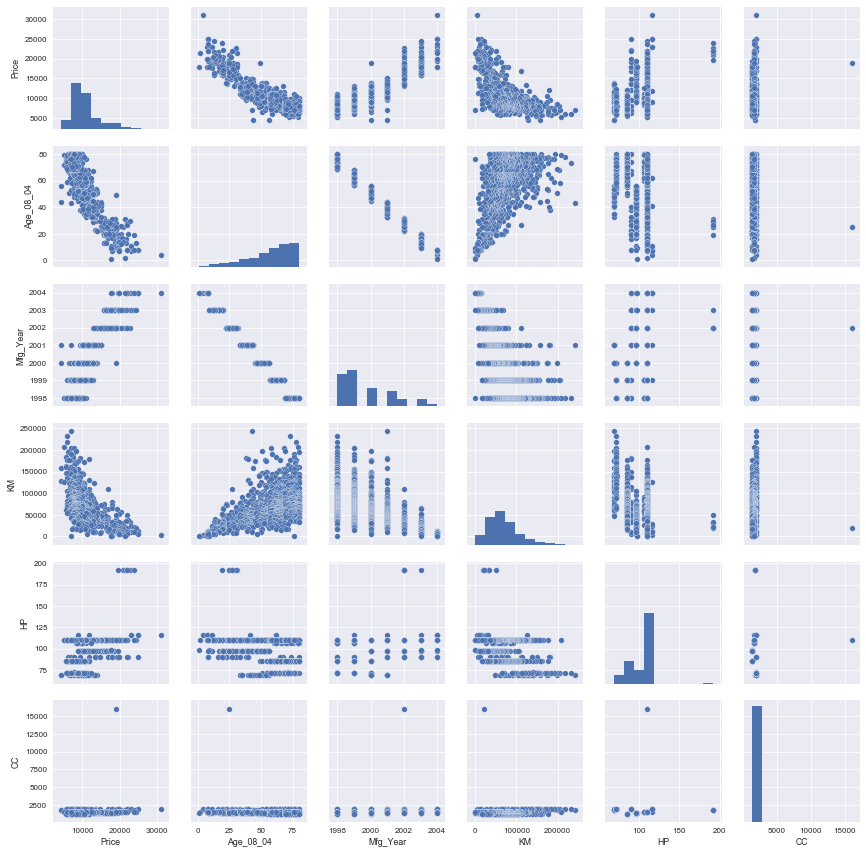

In [7]:
plt.clf()
with plt.style.context(('seaborn-darkgrid')):
    sns_plot = sns.pairplot(pd.concat([data.Price, data[col_nu[:5]]], axis = 1), size = 2)
plt.show()

### We may find few implication from this graph
* First, 'Age_08_04' and 'KM' seems to be strongly related to our target, Price. (The relationship of 'KM' is not as linear as 'Age_08_04', though)


* Second, although 'CC' and 'HP' are continuous real values, they behave more likely as categorical value in this case


* Thrid, 'Mfg_Year' and 'Age_08_04' seems to have significant correlation each other, which indicates that those two values may bring 'Multicollinearity' issue when we include both of them in the prediction model.

### Quick overview of the relationship between 'Price' and 'Numerical Columns(Next 5 Columns) '

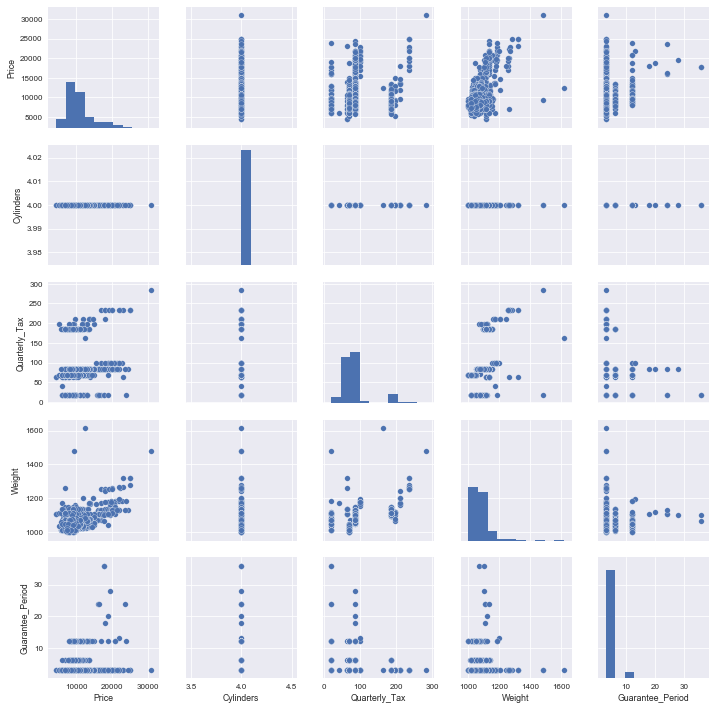

In [8]:
plt.clf()
with plt.style.context(('seaborn-darkgrid')):
    sns_plot = sns.pairplot(pd.concat([data.Price, data[col_nu[5:]]], axis = 1), size = 2)
plt.show()

### The other continuous values are not as impressive as previous ones

In [9]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

### Checking out the categorical values
* Note: I am going to use the box plot instead, because...
    * there are only a number of values to be on x-axis
    * box-plot can provide additional information such as median, quantiles and etc.

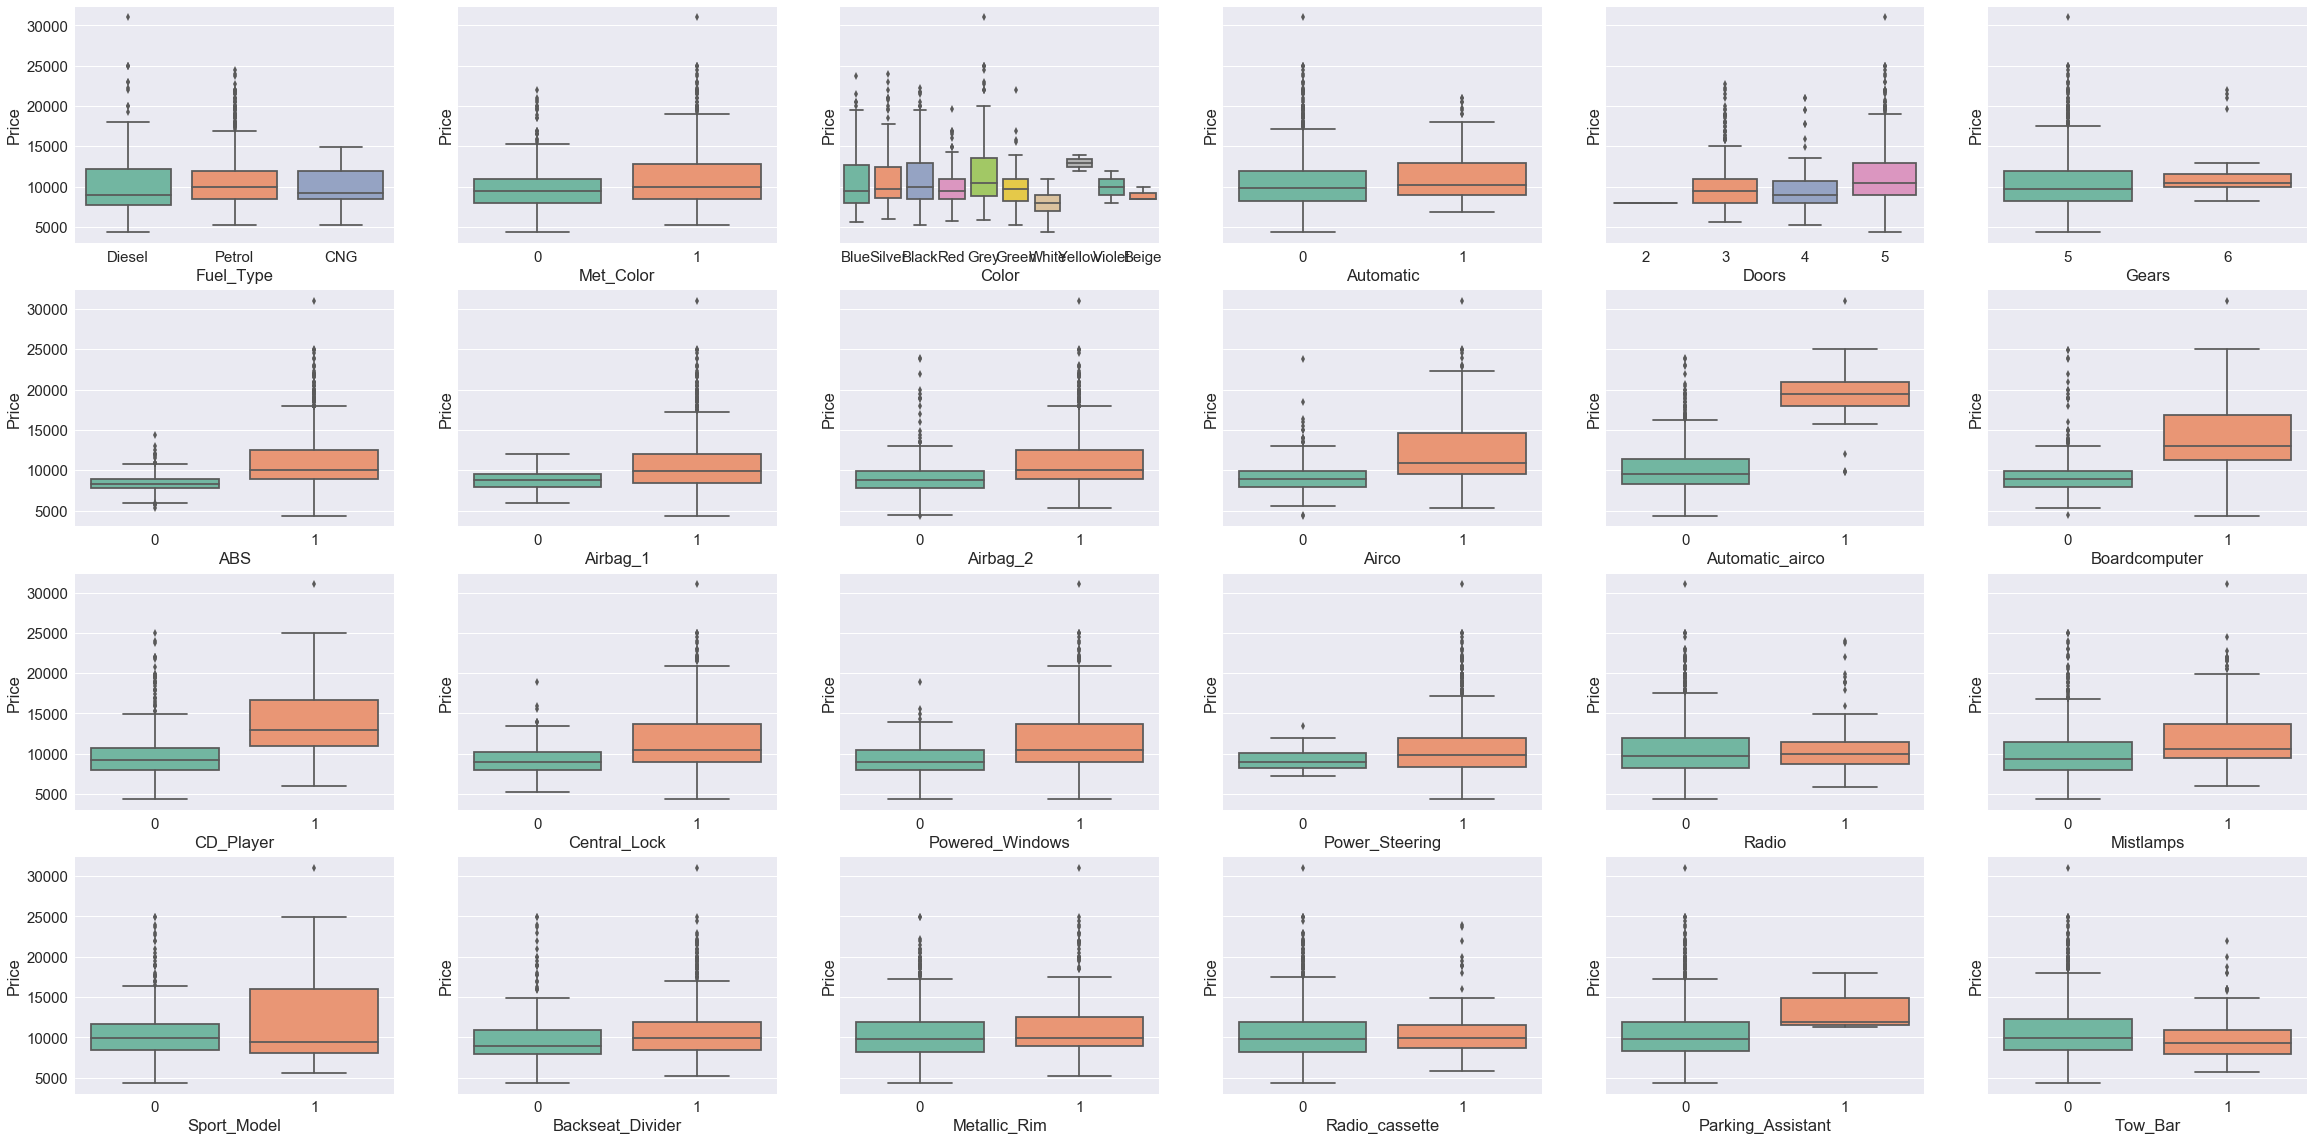

In [10]:
with plt.style.context("seaborn-paper"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(4, 6, figsize =(40, 20), sharey='all')
    for num, ax in zip(range(24), axes.flat):
        try:
            sns.boxplot(x = data[col_cat[0+num]], y = data['Price'], palette = 'Set2', ax = ax)
        except:
            pass


# Let's start the Pre-Processing
* The pre-processing in this project includes two parts
    * Process the outliers
    * Process the questionable values(ex: not realistic, out of category...)

In [11]:
post_data = data.copy()
post_data = pd.DataFrame(post_data)

### There are some data with unrealistic 'CC' values. 
* 'CC' values is supposed to be in the unit of hundreds
* The data included some value as '16000', which is suspected to be typing error

In [12]:
post_data['CC'].value_counts()

1600     608
1300     177
1400     114
2000      81
1900      22
1800       9
1598       2
1587       2
1995       1
16000      1
1398       1
1332       1
Name: CC, dtype: int64

### I did not want to discard the data just because of the wrong 'CC' values.
### I have replaced the values to the closed 'CC' values in terms of hundreds unit

In [13]:
post_data['CC'].replace(1598, 1600, inplace=True)
post_data['CC'].replace(1587, 1600, inplace=True)
post_data['CC'].replace(1995, 1900, inplace=True)
post_data['CC'].replace(16000, 1600, inplace=True)
post_data['CC'].replace(1398, 1400, inplace=True)
post_data['CC'].replace(1332, 1300, inplace=True)

#### The data have been replaced as below

In [14]:
print (data['CC'].value_counts())
print (post_data['CC'].value_counts())

1600     608
1300     177
1400     114
2000      81
1900      22
1800       9
1598       2
1587       2
1995       1
16000      1
1398       1
1332       1
Name: CC, dtype: int64
1600    613
1300    178
1400    115
2000     81
1900     23
1800      9
Name: CC, dtype: int64


### There were extremely small values of 'KM', although some of the models were very old. 
* This one is little bit more tricky compared to the 'CC', because the used cars CAN HAVE low 'KM values. 
* Eventually I've decided to replace the values to the median of 'KM'value from the same year models.
    * First, extremely low values of 'KM' could damage prediction accuracy
    * Second, I compared the 'Prices' of these data sets with other data with the same year models(ex: compare the price of 1998 model with 1 km and 1998 model with 100000 km) and found out there were no price differences. If so, it's either that the inserted values were mistake or that the 'KM' doesn't affect the price at all. In either case, replacing the value to the median makes sense.

In [15]:
print (post_data[post_data['KM']==1][post_data['Mfg_Year']==1998].index)
print (post_data[post_data['KM']==1][post_data['Mfg_Year']==2003].index)
print (post_data[post_data['KM']==1][post_data['Mfg_Year']==2004].index)
print (post_data[post_data['KM']==15][post_data['Mfg_Year']==2004].index)

Int64Index([1018], dtype='int64')
Int64Index([125], dtype='int64')
Int64Index([83, 133], dtype='int64')
Int64Index([132], dtype='int64')


/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [16]:
print (post_data['KM'][post_data['Mfg_Year']==1998].median())
print (post_data['KM'][post_data['Mfg_Year']==2003].median())
print (post_data['KM'][post_data['Mfg_Year']==2004].median())

82635.0
22881.5
8574.0


In [17]:
post_data.loc[1018,'KM']= 82635.0
post_data.loc[125,'KM']= 22881.5
post_data.loc[83, 'KM'] = 8574.0
post_data.loc[133, 'KM'] = 8574.0
post_data.loc[132, 'KM'] = 8574.0

#### 또한 CC를 잘못 적은 경우가 있을 수 있어 모델에 나와있는 배기량 정보와 CC 컬럼과 비교하여 수정하였다

### Note that the 'Model' Column includes the 'CC' Information

In [18]:
post_data['Model'].head()

0        TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
1        TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
2          TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors
3    TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors
4    TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...
Name: Model, dtype: object

### However, I've found that some of these CC values do not match the values from 'CC' columns
* Below is the example

In [19]:
post_data.loc[63, ['Model', 'CC']]

Model    TOYOTA Corolla 2.0 D 4D Linea Sol 3 Doors 2/3-...
CC                                                    1900
Name: 63, dtype: object

### Which value is more likely to be correct? 
* Hard to tell. 
* But my reasoning is that when we think about the probability of making type error, it's easier to make a mistake for typing numerical value such as 'CC', compared to typing the full text as Model. In fact, there was no single typo error in Model columns, which gives us the hint that probably the 'Model' value was directly imported from DB or coped & pasted. 
* Therefore, I changed the CC values to be identical with the information given by Model column

In [20]:
post_data.iloc[[63, 96, 101, 145, 336, 342, 445, 589, 678], post_data.columns.get_indexer(['Price','Model','engine','CC', 'Mfg_Year'])]
post_data.loc[63,'CC'] = 2000
post_data.loc[336,'CC'] = 1900
post_data.loc[342,'CC'] = 1400
post_data['CC'][342]

1400

<br>
<br>
# Run Simple Linear Regression Model


In [21]:
y_data = post_data['Price']
cols_nu = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight','Guarantee_Period']
cols_cat = ['Model','Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Doors', 'Gears', 'Mfr_Guarantee', 'BOVAG_Guarantee',
            'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
            'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
x_nu = post_data[cols_nu]
x_cat = post_data[cols_cat]

In [22]:
nu_variable_stats = pd.DataFrame(index = cols_nu, columns = ['R2', 'P-value', 'Beta'])
cat_variable_stats = pd.DataFrame(index = cols_cat, columns = ['R2', 'P-value', 'Beta'])

### I have created the simple table in which I can easily compare the R**2 and P-value of each variable

In [23]:
for i in cols_nu:
    model = smf.ols("Price ~ {}".format(i), post_data).fit()
    nu_variable_stats.loc[i, 'R2'] = model.rsquared
    nu_variable_stats.loc[i, 'P-value'] = model.f_pvalue
    nu_variable_stats.loc[i, 'Beta'] = model.params[1]
nu_variable_stats.sort_values('R2', ascending=False)

,R2,P-value,Beta
Mfg_Year,0.797988,0,2085.3
Age_08_04,0.781279,0,-171.649
KM,0.333567,1.03694e-91,-0.0551872
Weight,0.310266,4.1794e-84,39.2081
HP,0.0991609,6.8285e-25,76.8569
Quarterly_Tax,0.0319958,8.95663e-09,16.4635
Guarantee_Period,0.0276028,9.60109e-08,205.276
CC,0.0210399,3.33192e-06,2.83832


In [24]:
for i in cols_cat:
    model = smf.ols("Price ~ {}".format(i), post_data).fit()
    cat_variable_stats.loc[i, 'R2'] = model.rsquared
    cat_variable_stats.loc[i, 'P-value'] = model.f_pvalue
    cat_variable_stats.loc[i, 'Beta'] = model.params[1]

cat_variable_stats.sort_values('R2', ascending=False)[:5]

,R2,P-value,Beta
Model,0.916366,3.84556e-261,550
Boardcomputer,0.365576,1.3363e-102,4846.7
Automatic_airco,0.354131,1.20611e-98,9063.62
CD_Player,0.243082,1.58629e-63,4254.76
Airco,0.197411,1.52604e-50,3210.9



### For categorical values, however, we also need to know what values they include and also how the proportion of each value looks like. 
### Below is the modified table for categorial variables

In [25]:
for i in cols_cat[1:]: 
    temp_dict = dict(x_cat[i].value_counts())
    total = sum(temp_dict.values())
    for key in temp_dict.keys():
        cat_variable_stats.loc[i, key] = temp_dict[key] / float(total) * 100
for i in cols_cat:
    model = smf.ols("Price ~ {}".format(i), post_data).fit()
    cat_variable_stats.loc[i, 'R2'] = model.rsquared
    cat_variable_stats.loc[i, 'P-value'] = model.f_pvalue
    cat_variable_stats.loc[i, 'Beta'] = model.params[1]

cat_variable_stats.sort_values('R2', ascending=False)[:5]

,R2,P-value,Beta,Petrol,Diesel,CNG,1,0,Grey,Red,...,Silver,White,Beige,Yellow,Violet,5,3,4,2,6
Model,0.916366,3.84556e-261,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boardcomputer,0.365576,1.3363e-102,4846.7,NaN,NaN,NaN,28.361138,71.638862,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Automatic_airco,0.354131,1.20611e-98,9063.62,NaN,NaN,NaN,5.986261,94.013739,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Player,0.243082,1.58629e-63,4254.76,NaN,NaN,NaN,22.669284,77.330716,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airco,0.197411,1.52604e-50,3210.9,NaN,NaN,NaN,50.441609,49.558391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creating New Variables

### First, from EDA perspective

* Looking at the correlation of 'Mfg_Year' with 'Price', it seems like the relationship is not purely linear.
* There is a big hike of the price from '02 Model'. 
* We can see the hike applies not only to the average but also to the range. 

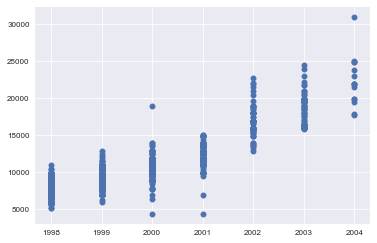

In [26]:
plt.scatter(post_data['Mfg_Year'], post_data['Price'])
plt.show()

### Since the data 'Before 2002' and 'After 2002' seems to be discrete, let's create the categorical variable called 'After 2002'

In [27]:
post_data['After_2002'] = post_data.apply(lambda x: x['Mfg_Year'] < 2002, axis = 1)
dummy = pd.get_dummies(post_data['After_2002'], drop_first=True)
dummy.columns = ['After_2002']
post_data['After_2002'] = dummy['After_2002']
post_data['After_2002'].value_counts()

1    885
0    134
Name: After_2002, dtype: int64

### There MUST BE some helpful information in 'Model' column, because manufacturers name their products in a way which customers can distinguish the grade. 
#### Eventually, I've noticed that the models including 'VVT' in their name are more expensive the models do not have 'VVT' in their names

In [28]:
post_data.groupby('Model', as_index=True)['Price'].mean().sort_values()

Model
TOYOTA Corolla 1.8D Stationwagen                               4400.000000
TOYOTA Corolla 1.6 LB *G3* AIRCO 4/5-Doors                     5250.000000
TOYOTA Corolla 1.3 I LUNA 2/3-Doors                            5845.000000
TOYOTA Corolla 2.0 DSL WAGON LINEA TERRA COMM Anders           5900.000000
TOYOTA Corolla 1.3i LINEA TERRA 2/3-Doors                      5950.000000
TOYOTA Corolla 1.3 16v linea terra                             5950.000000
TOYOTA Corolla 1.3 16V Linea Terra 2/3-Doors                   5950.000000
TOYOTA Corolla 2.0diesel Stationwagen                          6250.000000
TOYOTA Corolla 1.9 D SEDAN TERRA 4/5-Doors                     6400.000000
TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors                        6875.000000
TOYOTA Corolla 1.6 lb aut 4/5-Doors                            6900.000000
TOYOTA Corolla 2.0D TERRA LIFTBACK 4/5-Doors                   6900.000000
TOYOTA Corolla 1.3 LIN. Terra 2/3-Doors                        6900.000000
TOYOTA Corolla 1.6 

#### Let's add the 'VVT' variable telling us whether the data point is VVT model or not

In [29]:
import re
pattern = re.compile(r'vvt', flags=re.IGNORECASE)
vvt= []
for i in post_data['Model']:
    result = pattern.search(i)
    if result:
        vvt.append(1)
    else:
        vvt.append(0)

post_data['vvt'] = pd.Series(vvt)
post_data[:2]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,After_2002,vvt
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986.0,Diesel,90,1,...,0,0,0,1,0,0,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937.0,Diesel,90,1,...,0,0,0,1,0,0,0,0,0,0


## Second, from Heuristic Perspective

* Usually several options are combined and provided as a 'Premium Package'.
### Let's combine the options(categorical variables) that have 10% ~ 30% of R**2 values 
  (note: the weights were calculated AFTER we simulated the multi-variables linear regression)

In [30]:
post_data['Premium_option'] = (post_data['CD_Player']*2)+(post_data['Airco']*1.2)+post_data['Powered_Windows']+post_data['Central_Lock']+post_data['ABS']

* Recall the time we bought our own automobiles. 
* We would first ask the dealer 'what model of the year' the car is.
* Then, if the several cars were the same model, we would choose the one with less Km. 
### Therefore, it might be meaningful if we can find relative 'Km' among the same 'Mfg_Year' group of cars. 
     (The calculation is similar to standardization of scale)

In [31]:
post_data['KM_from_mean'] = ''
kmmean_1998 = post_data['KM'][post_data['Mfg_Year']==1998].mean()
kmstd_1998 = post_data['KM'][post_data['Mfg_Year']==1998].std()

kmmean_1999 = post_data['KM'][post_data['Mfg_Year']==1999].mean()
kmstd_1999 = post_data['KM'][post_data['Mfg_Year']==1999].std()

kmmean_2000 = post_data['KM'][post_data['Mfg_Year']==2000].mean()
kmstd_2000 = post_data['KM'][post_data['Mfg_Year']==2000].std()

kmmean_2001 = post_data['KM'][post_data['Mfg_Year']==2001].mean()
kmstd_2001 = post_data['KM'][post_data['Mfg_Year']==2001].std()

kmmean_2002 = post_data['KM'][post_data['Mfg_Year']==2002].mean()
kmstd_2002 = post_data['KM'][post_data['Mfg_Year']==2002].std()

kmmean_2003 = post_data['KM'][post_data['Mfg_Year']==2003].mean()
kmstd_2003 = post_data['KM'][post_data['Mfg_Year']==2003].std()

kmmean_2004 = post_data['KM'][post_data['Mfg_Year']==2004].mean()
kmstd_2004 = post_data['KM'][post_data['Mfg_Year']==2004].std()

temp_list = []
for i in range(len(post_data['Mfg_Year'])):
    if post_data.loc[i,'Mfg_Year'] == 1998:
        temp_list.append((kmmean_1998 - post_data.loc[i, 'KM'])/kmstd_1998)
    elif post_data.loc[i,'Mfg_Year'] == 1999:
        temp_list.append((kmmean_1999 - post_data.loc[i, 'KM'])/kmstd_1999)
    elif post_data.loc[i,'Mfg_Year'] == 2000:
        temp_list.append((kmmean_2000 - post_data.loc[i, 'KM'])/kmstd_2000)
    elif post_data.loc[i,'Mfg_Year'] == 2001:
        temp_list.append((kmmean_2001 - post_data.loc[i, 'KM'])/kmstd_2001)
    elif post_data.loc[i,'Mfg_Year'] == 2002:
        temp_list.append((kmmean_2002 - post_data.loc[i, 'KM'])/kmstd_2002)
    elif post_data.loc[i,'Mfg_Year'] == 2003:
        temp_list.append((kmmean_2003 - post_data.loc[i, 'KM'])/kmstd_2003)
    elif post_data.loc[i,'Mfg_Year'] == 2004:
        temp_list.append((kmmean_2004 - post_data.loc[i, 'KM'])/kmstd_2004)
    else:
        print ("Something wrong at{}".format(i))

post_data['KM_from_mean_std_base'] = temp_list  

In [32]:
temp_list = []
for i in range(len(post_data['Mfg_Year'])):
    if post_data.loc[i,'Mfg_Year'] == 1998:
        temp_list.append((kmmean_1998 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 1999:
        temp_list.append((kmmean_1999 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 2000:
        temp_list.append((kmmean_2000 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 2001:
        temp_list.append((kmmean_2001 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 2002:
        temp_list.append((kmmean_2002 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 2003:
        temp_list.append((kmmean_2003 - post_data.loc[i, 'KM']))
    elif post_data.loc[i,'Mfg_Year'] == 2004:
        temp_list.append((kmmean_2004 - post_data.loc[i, 'KM']))
    else:
        print ("Something wrong at{}".format(i))

post_data['KM_from_mean'] = temp_list


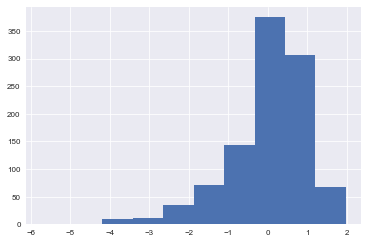

In [33]:
plt.hist(post_data['KM_from_mean_std_base'])
plt.show()

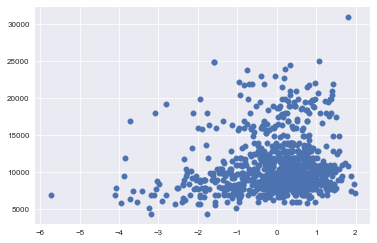

In [34]:
plt.scatter(post_data['KM_from_mean_std_base'], post_data['Price'])
plt.show()

#### We subtracted the price from the average, so the higher x value means 'less Km' compared to the mean. 
#### Not too strongm, but it seems to have linear positive correlation with price.

## Finally, I proceeded the dummification for the categorical variables I am goint to use

In [35]:
dummy = pd.get_dummies(post_data['Doors'], drop_first=True)
dummy.columns = ['D3','D4', 'D5']
dummy[:3]
post_data = pd.concat([post_data, dummy], axis = 1)
dummy = pd.get_dummies(post_data['Fuel_Type'], drop_first=True)
dummy.columns = ['Diesel','Petrol']
dummy[:3]
post_data = pd.concat([post_data, dummy], axis = 1)

### Let's append the newly created variables to my column list

In [38]:
y_data = post_data['Price']
cols_nu = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight','Guarantee_Period', 'Premium_option', 
           'KM_from_mean_std_base', 'KM_from_mean']
cols_cat = ['Model', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Doors', 'Gears', 'Mfr_Guarantee', 'BOVAG_Guarantee',
            'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
            'Radio_cassette', 'Parking_Assistant', 'Tow_Bar','After_2002', 'vvt', 'D3', 'D4', 'D5', 'Diesel', 'Petrol']

### To briefly summarize the created variables...
* Created the varialbe which tells us whether the data is 'Before 2002' model or 'After 2002' model.
* Created the variable which tells us whether the data is VVT model or not
* Created the variable called 'Premium Option', which is the sum of options with lower R**2 values
* Created the variable which tells us whether the data has higher or lower Km compared to the group of the same Mfg_year


# Re-Run the Simple Linear Regression Model

In [39]:
for i in cols_nu:
    model = smf.ols("Price ~ {}".format(i), post_data).fit()
    nu_variable_stats.loc[i, 'R2'] = model.rsquared
    nu_variable_stats.loc[i, 'P-value'] = model.f_pvalue
    nu_variable_stats.loc[i, 'Beta'] = model.params[1]
nu_variable_stats.sort_values('R2', ascending=False)

,R2,P-value,Beta
Mfg_Year,0.797988,0,2085.3
Age_08_04,0.781279,0,-171.649
Premium_option,0.356501,1.85348e-99,1114.52
KM,0.333567,1.03694e-91,-0.0551872
Weight,0.310266,4.1794e-84,39.2081
HP,0.0991609,6.8285e-25,76.8569
Quarterly_Tax,0.0319958,8.95663e-09,16.4635
Guarantee_Period,0.0276028,9.60109e-08,205.276
CC,0.0210399,3.33192e-06,2.83832
KM_from_mean_std_base,0.0173681,2.44129e-05,477.822


In [40]:
for i in cols_cat[1:]: 
    temp_dict = dict(post_data[i].value_counts())
    total = sum(temp_dict.values())
    for key in temp_dict.keys():
        cat_variable_stats.loc[i, key] = temp_dict[key] / float(total) * 100

for i in cols_cat:
    model = smf.ols("Price ~ {}".format(i), post_data).fit()
    cat_variable_stats.loc[i, 'R2'] = model.rsquared
    cat_variable_stats.loc[i, 'P-value'] = model.f_pvalue
    cat_variable_stats.loc[i, 'Beta'] = model.params[1]


cat_variable_stats.sort_values('R2', ascending=False)

,R2,P-value,Beta,Petrol,Diesel,CNG,1,0,Grey,Red,...,Silver,White,Beige,Yellow,Violet,5,3,4,2,6
Model,0.916366,3.84556e-261,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
After_2002,0.664398,2.33686e-243,-8714.81,NaN,NaN,NaN,86.849853,13.150147,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boardcomputer,0.365576,1.3363e-102,4846.7,NaN,NaN,NaN,28.361138,71.638862,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Automatic_airco,0.354131,1.20611e-98,9063.62,NaN,NaN,NaN,5.986261,94.013739,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vvt,0.350618,1.91189e-97,4557.91,NaN,NaN,NaN,32.777233,67.222767,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Player,0.243082,1.58629e-63,4254.76,NaN,NaN,NaN,22.669284,77.330716,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airco,0.197411,1.52604e-50,3210.9,NaN,NaN,NaN,50.441609,49.558391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Powered_Windows,0.131775,4.26527e-33,2647.29,NaN,NaN,NaN,56.722277,43.277723,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central_Lock,0.13047,9.19823e-33,2649.6,NaN,NaN,NaN,58.586850,41.413150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABS,0.0926474,2.753e-23,2823.78,NaN,NaN,NaN,81.354269,18.645731,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Run Multiple-Linear Regression Model

In [41]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

### Model Description
* I referenced the R**2 and p-value of each variable from simple linear regression result 
* Then I used stepwise approach to decide which variables I am going to include in the model
* I used both stats.ols module and sklearn moduel 
* Finally, I chose the model that provided the highest R-squred value while meeting the following conditions:

    ** The p-value of each variable should be under 0.05
    
    ** The result of cross-valdiation should not be dynamic when I run it multiple times
    
    ** Keep the number of variables lower than 10


In [42]:
train_component = ['Age_08_04', 'KM', 'Premium_option', 'Weight',
                              'Boardcomputer','Automatic_airco', 'vvt', 'After_2002']
train_variable= post_data[train_component]



In [44]:
model = LinearRegression()
score = cross_val_score(model, train_variable, y_data, cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.86490705  0.86655153  0.91829387  0.91082969  0.79876275  0.8877238
  0.90221578  0.8774049   0.90769211  0.89788442]
0.883226589474


In [45]:
model_ols = smf.ols("Price ~ Age_08_04 + KM + Premium_option + Weight + Boardcomputer + Automatic_airco + vvt + After_2002", post_data).fit()
print (model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1062.
Date:                Sat, 12 Aug 2017   Prob (F-statistic):               0.00
Time:                        23:02:52   Log-Likelihood:                -8651.5
No. Observations:                1019   AIC:                         1.732e+04
Df Residuals:                    1010   BIC:                         1.737e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4599.5398   1150.140     

<br>
# Apply the model to the Test Set 

In [48]:
test_data = pd.read_csv('test.csv', encoding='ISO-8859-1') 

In [49]:
test_data['After_2002'] = test_data.apply(lambda x: x['Mfg_Year'] < 2002, axis = 1)

In [50]:
dummy = pd.get_dummies(test_data['After_2002'], drop_first=True)
dummy.columns = ['After_2002']
test_data['After_2002'] = dummy['After_2002']
test_data['After_2002'].value_counts()

1    365
0     52
Name: After_2002, dtype: int64

In [51]:
import re
pattern = re.compile(r'vvt', flags=re.IGNORECASE)
vvt= []
for i in test_data['Model']:
    result = pattern.search(i)
    if result:
        vvt.append(1)
    else:
        vvt.append(0)

test_data['vvt'] = pd.Series(vvt)

In [52]:
test_data['Premium_option'] = (test_data['CD_Player']*2)+(test_data['Airco']*1.2)+test_data['Powered_Windows']+test_data['Central_Lock']+test_data['ABS']

In [53]:
test_data['Predicted'] =''
y_hat_data = test_data['Predicted']
test_cols_nu = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight','Guarantee_Period', 'Premium_option']
test_cols_cat = ['Model', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Doors', 'Gears', 'Mfr_Guarantee', 'BOVAG_Guarantee',
            'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
            'Radio_cassette', 'Parking_Assistant', 'Tow_Bar','After_2002', 'vvt']

In [54]:
test_data[:2]

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,After_2002,vvt,Premium_option,Predicted
0,3,åÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,0,0,0,1.0,
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,0,0,0,1.0,


In [55]:
model.fit(post_data[train_component],
          post_data[['Price']])
test_data['Predicted'] = model.predict(test_data[train_component])

In [56]:
test_data.to_csv('test_submission.csv')

<br>
# Additional works for some fun...

### After the project, I recieved the Actual y-value of the test set and ran our model

In [57]:
all_set = pd.read_excel('explanation-of-features.xls', sheetname='data')

In [59]:
gap = pd.DataFrame()
gap['Id'] = test_data['Id']
gap['Predicted'] = test_data['Predicted']
gettheprice = []
for i in gap['Id']:
    gettheprice.append(int(all_set['Price'][all_set['Id']==i]))
print (gettheprice[5])

21500


In [60]:
gap['realprice'] = gettheprice
gap['sse'] = (gap.Predicted - gap.realprice)**2
avg_realprice = gap['realprice'].mean()
gap['ssr'] = (gap.Predicted - avg_realprice)**2

In [61]:
model_rsqare = gap['ssr'].sum() / (gap['sse'].sum() + gap['ssr'].sum())
print (model_rsqare)
print (gap['sse'].mean())

0.8785277456620981
1521032.2204359935


### The scoe was not too bad :)

### But I wanted to test my hypothesis which I did not apply to this project due to the limited amount data
#### The hypothesis was:
    - Why should we have only one model for the prediction? (In common sense, one model can't fit to all)
    - If the price range of two group is very different, isn't it more reasonable to have 'two different models' to predict the outcome?


## So I made two models instead of one. 
#### Model-1 will predict the price of cars that were manufactured after 2002
#### Model-2 will predict the price of cars that were manufactured before 2002

In [62]:
model_after2002 = LinearRegression()
model_after2002.fit(post_data[['Age_08_04', 'KM', 'Boardcomputer','Automatic_airco', 
                      'Weight', 'vvt', 'Premium_option']][post_data['After_2002']==1],post_data['Price'][post_data['After_2002'] == 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
model_before2002 = LinearRegression()
model_before2002.fit(post_data[['Age_08_04', 'KM', 'Boardcomputer','Automatic_airco', 
                      'Weight', 'vvt', 'Premium_option', 'CC']][post_data['After_2002']==0],post_data['Price'][post_data['After_2002'] == 0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
test_data['Predicted'] = 0

In [65]:
test_data['Predicted'][test_data['After_2002'] == 1] = model_after2002.predict(test_data[['Age_08_04', 'KM', 'Boardcomputer','Automatic_airco',
                                               'Weight', 'vvt', 'Premium_option']][test_data['After_2002']==1])

/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
test_data['Predicted'][test_data['After_2002'] == 0] = model_before2002.predict(test_data[['Age_08_04', 'KM', 'Boardcomputer','Automatic_airco',
                                               'Weight', 'vvt', 'Premium_option','CC']][test_data['After_2002']==0])

/Users/aceit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
print (test_data['After_2002'].value_counts())

1    365
0     52
Name: After_2002, dtype: int64


In [68]:
gap = pd.DataFrame()
gap['Id'] = test_data['Id']
gap['Predicted'] = test_data['Predicted']
gettheprice = []
for i in gap['Id']:
    gettheprice.append(int(all_set['Price'][all_set['Id']==i]))
    
gap['realprice'] = gettheprice
gap['sse'] = (gap.Predicted - gap.realprice)**2
avg_realprice = gap['realprice'].mean()
gap['ssr'] = (gap.Predicted - avg_realprice)**2

model_rsqare = gap['ssr'].sum() / (gap['sse'].sum() + gap['ssr'].sum())
print (model_rsqare)
print (gap['sse'].mean())

0.9059823384755344
1209570.3965524684


# The score has been improved by using two models.
#### However, we do not have enough data points to verify "Before 2002", and this score could be just a result of luck.
#### I would not go with two models until I have more data points to train model-2(Before 2002). 

<br><br><br><br><br><br>
           
           